# Challenge 2: Image preprocessing
Transform the gear images into a particular format that can be used later on: 128x128x3 pixels (this means a 3-channel, 128x128 pixel square image - but please refrain from simply stretching the images).

Perform the following:
- Pad the color images with the predominant background color and reshape, without stretching, to a 128x128x3 pixel array shape
- "Stretch" the pixel range to be from 0 - 255 (inclusive or [0, 255])
- Save the data to disk in a format for easily reading back in.

In [1]:
# Pad and reshape image

import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image, ImageOps

def pad_to_square(img):
    pad = 20
    horizontal = max(0, img.shape[0] - img.shape[1]) // 2 + pad
    vertical = max(0, img.shape[1] - img.shape[0]) // 2 + pad
    padded = cv2.copyMakeBorder(img, vertical, vertical, horizontal, horizontal, cv2.BORDER_CONSTANT, value=(255, 255, 255))
    scaled = cv2.resize(padded, dsize=(128,128), interpolation = cv2.INTER_LINEAR)
    return scaled

def normalize(img):
    norm = np.zeros(img.shape)
    norm = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)
    return norm

def normalize2(img):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    img = img.astype('float')
    for i in range(3):
        minval = img[...,i].min()
        maxval = img[...,i].max()
        if minval != maxval:
            img[...,i] -= minval
            img[...,i] *= (255.0 / (maxval-minval))
    return img.astype(np.uint8)

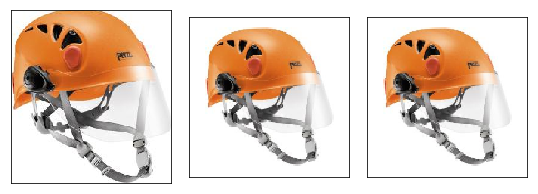

True

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2

path = "data/ch2test.jpeg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
prep = normalize(pad_to_square(img))
prep2 = normalize2(pad_to_square(img))

plt.figure(1, figsize=(10, 7))

plt.subplot(141)
plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(prep)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(prep2)
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

cv2.imwrite('data/ch2testup-updated.jpeg', cv2.cvtColor(prep, cv2.COLOR_RGB2BGR))

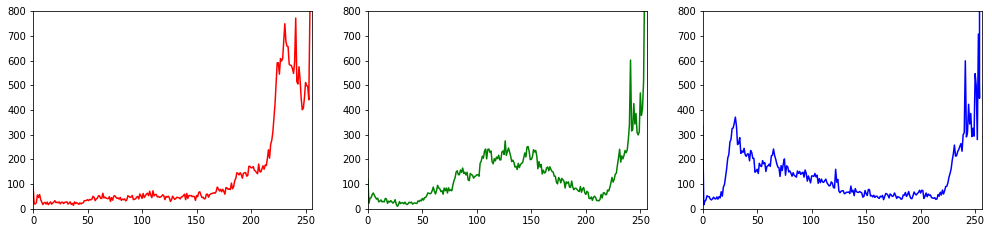

In [3]:
def plot_color_historgram(img):
    color = ('r','g','b')
    plt.figure(figsize=(17, 8))
    for i, col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(231 + i)
        plt.plot(histr,color=col)
        plt.xlim([0,256])
        plt.ylim([0,800])
    plt.show()
    
plot_color_historgram(img)

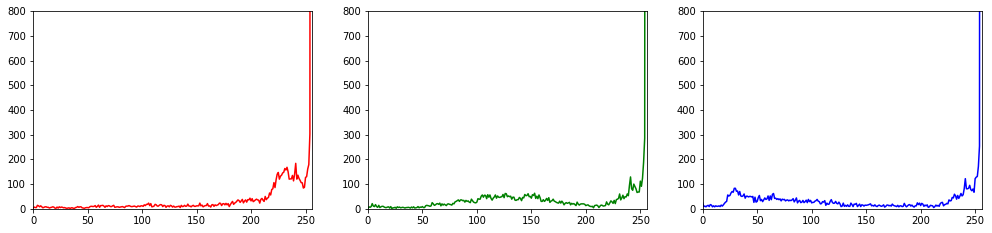

In [4]:
plot_color_historgram(prep)

Processing all pictures in the target directory

In [5]:
import os
from os import walk

def preprocess_images(in_folder, out_folder):
    for (dir_path, _, _) in walk(in_folder):
        # Walk the folders list
        out_path = out_folder + dir_path.replace(path, '')
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        # Get all files, but not directories
        files = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
        for file in files:
            img = cv2.imread(join(dir_path, file), cv2.IMREAD_UNCHANGED)
            # Removing fiel extention, like .jpeg
            file, _ = os.path.splitext(file)
            cv2.imwrite(os.path.join(out_path, file + '.jpg'), normalize(pad_to_square(img)))

path = "data/gear_images"
new_path = "data/gear_images_preprocessed"
print('Starting...')
preprocess_images(path, new_path)
print('    done')

Starting...
    done


Let's visualize the updated pictures

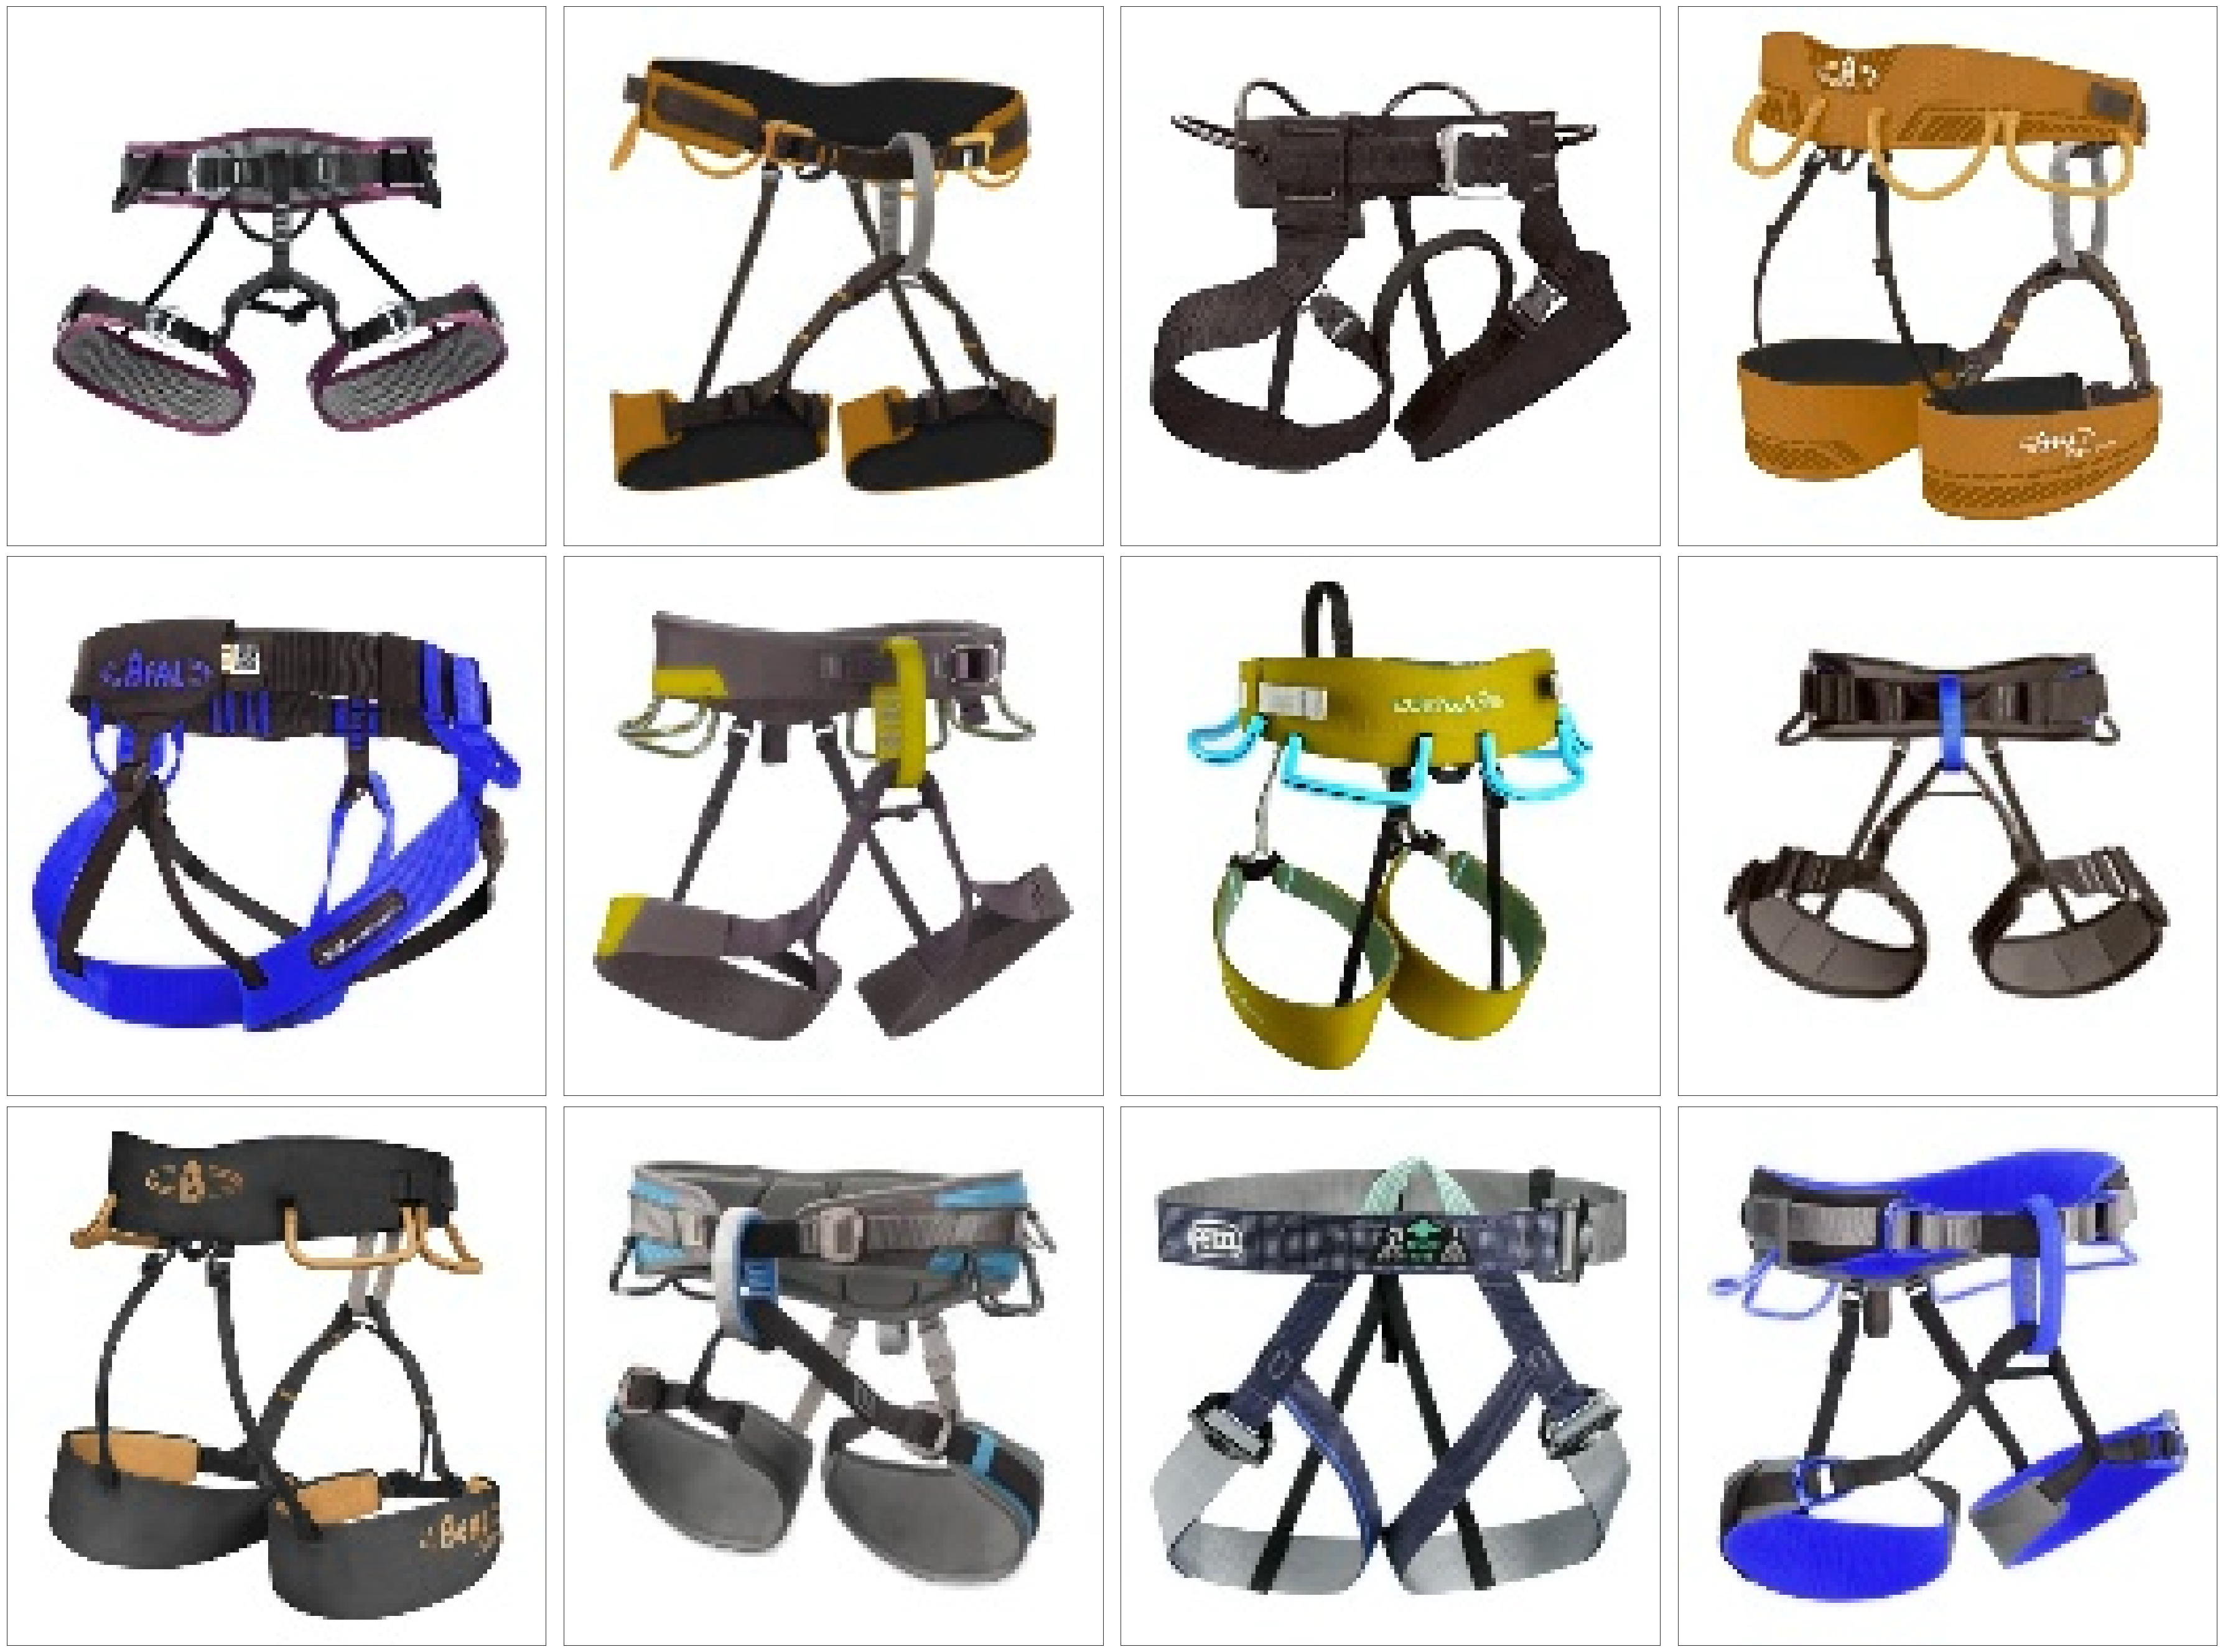

In [6]:
# Visualising the 
import matplotlib.pyplot as plt
import cv2
new_path = "data/gear_images_preprocessed"

fig=plt.figure(figsize=(50, 37))


listOfImg = list()
for (dir_path, _, _) in walk(new_path):
    listOfImg += [os.path.join(dir_path, f) for f in listdir(dir_path) if isfile(join(dir_path, f))]

rows = 3
columns = 4

for i, img in enumerate(listOfImg[:rows*columns], start=1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.imread(img))
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
        